**MERGE DATA FRAME**
* **Function:** Merge 2 dataframes that has something in common with each other
* **Syntax:** df1.merge( df2, on='common_column', how='inner')
* **Example:** df.merge(df_company, on='company name')

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df

#Clean data
df.job_posted_date = pd.to_datetime(df.job_posted_date)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\ADMIN\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Feb 17 18:21:58 2025).


In [2]:
dfvn = df[df['job_country']=="Vietnam"].copy()
dfvn['job_posted_month']=dfvn.job_posted_date.dt.strftime('%B')
dfvn_pivot=dfvn.pivot_table(
    index = 'job_posted_month',
    columns='job_title_short',
    aggfunc='size'

)
dfvn_pivot.reset_index(inplace = True)
dfvn_pivot['month_no']=pd.to_datetime(dfvn_pivot['job_posted_month'], format='%B')
dfvn_pivot['month_no']=dfvn_pivot.month_no.dt.month
dfvn_pivot.sort_values(by='month_no',inplace=True)
dfvn_pivot.set_index('job_posted_month',inplace=True)
dfvn_pivot.drop(columns='month_no',inplace=True)
dfvn_pivot['Cloud Engineer']=dfvn_pivot['Cloud Engineer'].fillna(dfvn_pivot['Cloud Engineer'].median())

In [3]:
dfvn_pivot_software=pd.read_csv('http://lukeb.co/software_csv',index_col='job_posted_month')
dfvn_pivot_software

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [4]:
dfvn_merge=dfvn_pivot.merge(dfvn_pivot_software, on='job_posted_month')
top=(dfvn_merge.
       sum().
       head().
       sort_values(ascending=False).
       index.tolist()
       )
top

['Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Business Analyst',
 'Cloud Engineer']

<Axes: xlabel='job_posted_month'>

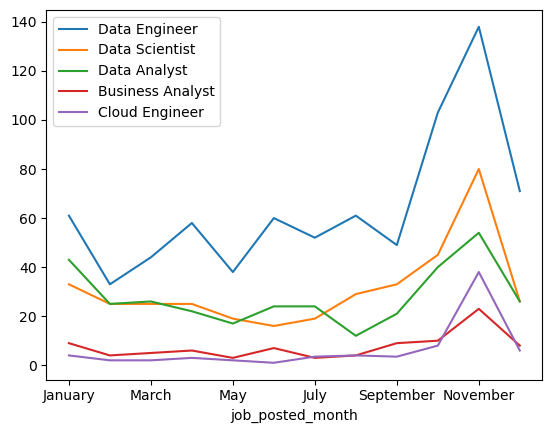

In [5]:
dfvn_merge[top].plot(kind='line')